<a href="https://colab.research.google.com/github/hassanaftab93/MyMasjid-Logs/blob/main/Logs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logs Analysis

## Installation of Libraries

In [1]:
!pip install --upgrade pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install zipfile-deflate64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.2 MB/s 


In [3]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
from google.colab import files

In [5]:
import glob
from zipfile import ZipFile
import zipfile_deflate64 as zipfile
from pathlib import Path
import os
import fnmatch
import csv
import re
from dask import dataframe as daskd

## [NEW] Configuring Google Cloud Storage Access



---



In [6]:
from google.colab import auth
auth.authenticate_user()

In [7]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/run/services/update_traffic.py
google-cloud-sdk/lib/surface/runtime_config/__init__.py
google-cloud-sdk/lib/surface/runtime_config/configs/__init__.py
google-cloud-sdk/lib/surface/runtime_config/configs/create.py
google-cloud-sdk/lib/surface/runtime_config/configs/delete.py
google-cloud-sdk/lib/surface/runtime_config/configs/describe.py
google-cloud-sdk/lib/surface/runtime_config/configs/list.py
google-cloud-sdk/lib/surface/runtime_config/configs/update.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/__init__.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/describe.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/get_value.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/list.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/set.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/unset.py
google-cloud-sdk/lib/surfa

In [8]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
core:
  account: hassanaftab.pk@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for this 
configuration:
 [1] hassanaftab.pk@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [hassanaftab.pk@gmail.com].

Pick cloud project to use: 
 [1] my-masjid-0786
 [2] Enter a project ID
 [3] 

### Google Colab -> <- GCP

Google Cloud -> Colab

`!gsutil cp [GCP Storage path] [Copy to where?]` <br>
e.g <br>
`!gsutil cp gs://maskaravivek-data/data_file.csv .`

Colab -> Google Cloud

`gsutil cp [File] [GCP Storage path]` <br>
e.g <br>
`gsutil cp test.csv gs://maskaravivek-data/`

## Copying all Raw Logs data from GCP Storage

In [9]:
!gsutil ls

gs://mymasjid-logs-october/
gs://mymasjid-raw-logs/


In [10]:
mkdir zipped_files

In [11]:
!gsutil cp gs://mymasjid-raw-logs/'MM Log files'/* ./zipped_files/

Copying gs://mymasjid-raw-logs/MM Log files/01 January.zip...
Copying gs://mymasjid-raw-logs/MM Log files/02 February.zip...
Copying gs://mymasjid-raw-logs/MM Log files/03 March.zip...
Copying gs://mymasjid-raw-logs/MM Log files/04 April.zip...
\ [4 files][859.0 MiB/859.0 MiB]   54.7 MiB/s                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://mymasjid-raw-logs/MM Log files/05 May.zip...
Copying gs://mymasjid-raw-logs/MM Log files/06 June.zip...
Copying gs://mymasjid-raw-logs/MM Log files/07 July.zip...
Copying gs://mymasjid-raw-logs/MM Log files/08 August.zip...
Copying gs://mymasjid-raw-logs/MM Log files/09 September.zip...
Copying gs://mymasjid-raw-logs/MM Log files/10 October.zip...
/ [10 files][  2.2 GiB/  2.2 GiB]   55.7 MiB/s             

## Checking copied files in working repo

In [12]:
rm -rf sample_data

In [13]:
cd zipped_files

/content/zipped_files


In [14]:
ls

'01 January.zip'   '04 April.zip'  '07 July.zip'       '10 October.zip'
'02 February.zip'  '05 May.zip'    '08 August.zip'
'03 March.zip'     '06 June.zip'   '09 September.zip'


In [15]:
cd ..

/content


## Extracting the Log files from the Zip files into the Extracted Logs folder

In [ ]:
#cd ../content

In [20]:
mkdir extracted_logs

In [23]:
raw_data = ""
directory_to_unzip = './zipped_files'
directory_to_extract_to = './extracted_logs'

In [24]:
for filename in os.scandir(directory_to_unzip):
    if filename.is_file():
        path_to_zip_file = filename.path
        with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
          zip_ref.extractall(directory_to_extract_to)

## Renaming of Extensions: .log -> .txt Files

In [25]:
cd extracted_logs

/content/extracted_logs


In [26]:
def change(old_ext,new_ext):
	[ os.rename( f,"%s.%s" % (os.path.splitext(f)[0],new_ext) ) for f in glob.glob(os.getcwd() + "/*." + old_ext) ]

In [27]:
change("log","txt")

## Checking extracted files

In [28]:
ls

u_ex221016.txt


In [29]:
cd ..

/content


In [30]:
ls

extracted_logs/  zipped_files/


In [31]:
rm -rf zipped_files

In [32]:
ls

extracted_logs/


---

## Removing redundant data from files and delimiting the files

In [33]:
new_file_var=""

In [42]:
files_count = 0
for files in os.scandir("./extracted_logs"):
  files_count += 1
print("Total Files in Extracted_Logs Folder: ",files_count)

Total Files in Extracted_Logs Folder:  1


In [44]:
count = 0

for files in os.scandir("./extracted_logs"):

  with open(files, mode='r') as f:
    new_file_var = f.read()
    new_file_var = new_file_var[106:]
    new_file_var = re.sub("[,]", "", new_file_var)
    new_file_var = re.sub("[ ]", ",", new_file_var)
    with open('aggregated_file.csv', 'a') as w:
      w.write(new_file_var)
      count+=1
      print("\nFiles appended: ",count,"/",files_count,"\t File Name:",files)
    new_file_var=""
  
  # For file testing purposes
  #if(count==2):
   # break


Files appended:  1 / 1 	 File Name: <DirEntry 'u_ex221016.txt'>


In [45]:
rm -rf extracted_logs

---

## Importing CSV files into Dataframe

In [46]:
filedata="./aggregated_file.csv"

In [47]:
logs=pd.read_csv(filedata,error_bad_lines=False)
#logs=daskd.read_csv(filedata)
#logs = pd.read_csv(filedata, chunksize=10000, error_bad_lines=False, engine='python')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 415066: expected 15 fields, saw 16\n'


## Basic Exploratory Analysis

In [ ]:
# for chunk in logs:
#   print(chunk.iloc[0])

In [48]:
logs.head()

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-10-16,00:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=8633067e-9d05-4a65-a0a0-a8499305f9ff,443.0,-,192.38.129.198,okhttp/4.9.0,-,200.0,0.0,0.0,140.0
1,2022-10-16,00:00:00,144.76.234.124,GET,/assets/fonts/montserrat/montserrat-extrabold-...,-,443.0,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200.0,0.0,0.0,156.0
2,2022-10-16,00:00:00,144.76.234.124,GET,/ngsw.json,ngsw-cache-bust=0.1322625226362878,443.0,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200.0,0.0,0.0,156.0
3,2022-10-16,00:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=4cf1bfce-34cf-4bd3-ab85-e380ee4d94e8,443.0,-,192.38.129.57,okhttp/4.9.0,-,200.0,0.0,0.0,156.0
4,2022-10-16,00:00:00,144.76.234.124,GET,/assets/audio/sound_adhan.mp3,-,443.0,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200.0,0.0,0.0,250.0


In [49]:
logs.dtypes

date                object
time                object
s-ip                object
cs-method           object
cs-uri-stem         object
cs-uri-query        object
s-port             float64
cs-username         object
c-ip                object
cs(User-Agent)      object
cs(Referer)         object
sc-status          float64
sc-substatus       float64
sc-win32-status    float64
time-taken         float64
dtype: object

In [50]:
logs.describe()

,s-port,sc-status,sc-substatus,sc-win32-status,time-taken
count,458701.000000,458701.000000,458701.000000,458701.000000,458701.000000
mean,442.958849,227.611891,0.133172,460.609164,7834.119496
std,3.864731,73.566038,0.617885,2274.133752,24019.595331
min,80.000000,200.000000,0.000000,0.000000,0.000000
25%,443.000000,200.000000,0.000000,0.000000,140.000000
50%,443.000000,200.000000,0.000000,0.000000,437.000000
75%,443.000000,206.000000,0.000000,0.000000,1719.000000
max,443.000000,502.000000,3.000000,12030.000000,580917.000000


In [51]:
test_empty_logs = logs[logs['cs(Referer)']=='-']
test_empty_logs['cs(Referer)'].value_counts()

-    110900
Name: cs(Referer), dtype: int64

## Missing Percentages of Columns

In [52]:
missing_percentages = logs.isna().sum().sort_values(ascending=False) / len(logs)
missing_percentages*100

s-port             0.000654
cs-username        0.000654
c-ip               0.000654
cs(User-Agent)     0.000654
cs(Referer)        0.000654
sc-status          0.000654
sc-substatus       0.000654
sc-win32-status    0.000654
time-taken         0.000654
cs-method          0.000436
cs-uri-stem        0.000436
cs-uri-query       0.000436
s-ip               0.000218
date               0.000000
time               0.000000
dtype: float64

## Missing Values in the Data (Bar chart)

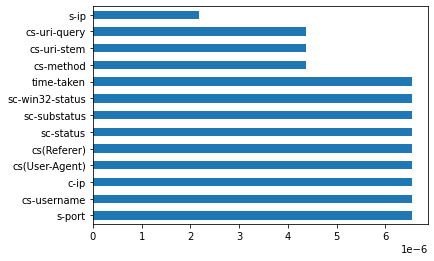

In [53]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

## Columns in CSV

In [54]:
logs.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [55]:
Statuses = logs['sc-status']
Statuses = Statuses.unique()
len(Statuses)

11

In [56]:
Statuses

array([200., 400., 304., 206., 500., 429., 401., 301., 502., 404.,  nan])

In [57]:
Status_Counts=logs['sc-status'].value_counts()
Status_Counts

200.0    333799
206.0     61258
304.0     26309
502.0     20362
400.0     16474
429.0       287
500.0       147
301.0        51
401.0        12
404.0         2
Name: sc-status, dtype: int64

In [58]:
Status_Counts = pd.DataFrame(Status_Counts)

In [59]:
column_names=['Status']
Status_Counts.columns = column_names

In [60]:
Status_Counts.describe()

,Status
count,10.000000
mean,45870.100000
std,103016.680501
min,2.000000
25%,75.000000
50%,8380.500000
75%,24822.250000
max,333799.000000


In [61]:
Status_Counts.columns

Index(['Status'], dtype='object')

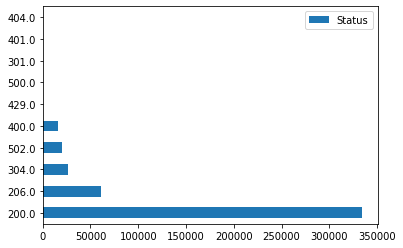

In [62]:
Status_Counts.plot(kind='barh')

# Cleaning Data

In [63]:
logs.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

## Date Column

In [64]:
Dates=logs['date'].value_counts()
Dates

2022-10-16    458701
#Software:         1
#Version:          1
#Date:             1
Name: date, dtype: int64

In [65]:
logs = logs[logs.date != 0]

In [66]:
logs = logs[logs.date != '#Software:']
logs = logs[logs.date != '#Version:']
logs = logs[logs.date != '#Date:']
logs = logs[logs.date != 'date']
logs = logs[logs.date != '#Fields:']

In [67]:
Dates=logs['date'].value_counts()
Dates

2022-10-16    458701
Name: date, dtype: int64

## Time Column

In [68]:
Times=logs['time'].value_counts()
Times

17:52:42    786
13:37:18    674
13:34:05    628
16:05:37    541
13:42:27    442
           ... 
08:16:22      1
08:16:21      1
08:16:15      1
21:04:28      1
07:26:17      1
Name: time, Length: 57000, dtype: int64

## s-ip Column

In [69]:
ServerIP=logs['s-ip'].value_counts()
ServerIP

144.76.234.124    458701
Name: s-ip, dtype: int64

## cs-method Column

In [70]:
Methods=logs['cs-method'].value_counts()
Methods

GET     451715
POST      6981
HEAD         5
Name: cs-method, dtype: int64

## cs-uri-stem Column

In [71]:
URI_Stem=logs['cs-uri-stem'].value_counts()
URI_Stem

/api/MessagesInfoScreen/GetActiveMessagesCountByMasjidId    70985
/api/Masjid/GetDetaisByGuidId                               50025
/ngsw.json                                                  40287
/api/Updates/GetUpdatedTimesofSystem                        38616
/api/TimingsInfoScreen/GetMasjidTimings                     31954
                                                            ...  
/Uploads/324e4c8b-7e06-48e2-bbac-6364e27e7e87-NWIA.jpg          1
/Uploads/5959a9d9-8bf4-459b-8e3c-c5818adaff6c-C975A.jpg         1
/timingscreen/141e15a4-d52b-4de5-bbb9-70006f15b0f2              1
/timingscreen/8e4f19eb-445a-4f8b-801e-7ce87420c5dc              1
/timingscreen/f2a9ea59-4cd0-4ba2-bdf2-564c4459ac0d              1
Name: cs-uri-stem, Length: 1460, dtype: int64

## cs-uri-query Column

In [72]:
URI_Query=logs['cs-uri-query'].value_counts()
URI_Query

-                                                           183990
guidId=9224d024-22d3-4921-9035-85ce510ada05                   4703
guidId=9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4                   4284
GuidId=9224d024-22d3-4921-9035-85ce510ada05                   2961
masjidGuid=9224d024-22d3-4921-9035-85ce510ada05&typeId=3      2936
                                                             ...  
ngsw-cache-bust=0.2756178702374754                               1
ngsw-cache-bust=0.7954861065077903                               1
ngsw-cache-bust=0.8309715821789285                               1
ngsw-cache-bust=0.4273710284968528                               1
ngsw-cache-bust=0.31141076899023634                              1
Name: cs-uri-query, Length: 48294, dtype: int64

## s-port Column

In [73]:
Server_Port=logs['s-port'].value_counts()
Server_Port

443.0    458649
80.0         52
Name: s-port, dtype: int64

## cs-username Column (Can drop, possibly)

In [74]:
User_Name=logs['cs-username'].value_counts()
User_Name

-    458701
Name: cs-username, dtype: int64

## c-ip Column

In [75]:
Client_IP=logs['c-ip'].value_counts()
Client_IP

188.181.122.11    18815
95.147.7.9         2882
101.166.27.79       933
83.137.6.169        850
50.49.108.202       804
                  ...  
78.70.1.147           1
92.40.200.117         1
172.58.224.167        1
85.146.15.40          1
88.12.54.146          1
Name: c-ip, Length: 17908, dtype: int64

## cs(User-Agent) Column

In [76]:
User_Agent=logs['cs(User-Agent)'].value_counts()
User_Agent

okhttp/4.9.0                                                                                                                                                                                                                                                69494
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)                                                                                                                                                            51277
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)                                                                                                                                                              21430
Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/537.36+(KHTML+like+Gecko)+OptiSigns/5.1.3+Chrome/94.0.4606.81+Electron/15.3.2+Safari/537.36                                                                                           

## cs(Referer) Column

In [77]:
Referer=logs['cs(Referer)'].value_counts()
Referer

-                                                                                               110900
https://time.my-masjid.com/ngsw-worker.js                                                        74373
https://time.my-masjid.com/                                                                      20020
https://time.my-masjid.com/timingscreen/9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4?sound=0&isapp=1     12948
https://time.my-masjid.com/timingscreen/9224d024-22d3-4921-9035-85ce510ada05                     11786
                                                                                                 ...  
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-core.css                1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-variables.css           1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-wind.css                1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-ic

## sc-status Column (Needs Cleaning, Where 'sc-status' == '404.0')

In [78]:
Status=logs['sc-status'].value_counts()
Status

200.0    333799
206.0     61258
304.0     26309
502.0     20362
400.0     16474
429.0       287
500.0       147
301.0        51
401.0        12
404.0         2
Name: sc-status, dtype: int64

In [79]:
logs404 = logs[logs['sc-status'] == 404]

In [80]:
logs404

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
103392,2022-10-16,07:00:33,144.76.234.124,GET,/.well-known/traffic-advice,-,443.0,-,74.125.208.48,Chrome+Privacy+Preserving+Prefetch+Proxy,-,404.0,0.0,2.0,15.0
162482,2022-10-16,11:21:26,144.76.234.124,GET,/.well-known/assetlinks.json,-,443.0,-,66.249.66.204,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,-,404.0,0.0,2.0,93.0


## sc-substatus Column

In [81]:
SubStatus=logs['sc-substatus'].value_counts()
SubStatus

0.0    438339
3.0     20362
Name: sc-substatus, dtype: int64

## sc-win32-status Column

In [82]:
Win32_Status=logs['sc-win32-status'].value_counts()
Win32_Status

0.0        411822
64.0        23805
12030.0      8240
12002.0      7666
1236.0       3131
121.0        2358
12029.0      1131
995.0         491
10054.0        37
22.0           16
2.0             2
1450.0          2
Name: sc-win32-status, dtype: int64

## time-taken Column

In [83]:
Time_Taken=logs['time-taken'].value_counts()
Time_Taken

46.0       22237
62.0       17864
78.0       14948
31.0       14308
93.0       13157
           ...  
17612.0        1
33582.0        1
26050.0        1
14436.0        1
19114.0        1
Name: time-taken, Length: 43866, dtype: int64

In [84]:
Time_test = logs[logs['time-taken'] == 0]
Time_test = Time_test[Time_test['sc-status'] == 200]

In [85]:
Time_test['time-taken'].value_counts()

0.0    32
Name: time-taken, dtype: int64

# Assigning Log Sections to Separate Data Frames grouped by Status + Type fixing

In [86]:
Status_Counts

,Status
200.0,333799
206.0,61258
304.0,26309
502.0,20362
400.0,16474
429.0,287
500.0,147
301.0,51
401.0,12
404.0,2


## Aggregating all Statuses into respective DataFrames

In [87]:
Status_200_ints = logs[logs['sc-status'] == 200]
Status_200_strings = logs[logs['sc-status'] == '200']
Status_200 = Status_200_ints.append(Status_200_strings)
Status_200 = pd.DataFrame(Status_200)
Status_200['sc-status'].astype(int)
Status_200['sc-status'] = pd.to_numeric(Status_200['sc-status'])
Status_200.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
458702,2022-10-16,23:59:59,144.76.234.124,GET,/api/MessagesInfoScreen/GetActiveMessagesCount...,masjidGuid=46c4af4e-e99e-4c13-8ade-64d45a0cbf95,443.0,-,72.143.238.23,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like...,https://time.my-masjid.com/timingscreen/46c4af...,200.0,0.0,0.0,890.0


In [88]:
Status_206_ints = logs[logs['sc-status'] == 206]
Status_206_strings = logs[logs['sc-status'] == '206']
Status_206 = Status_206_ints.append(Status_206_strings)
Status_206 = pd.DataFrame(Status_206)
Status_206['sc-status'].astype(int)
Status_206['sc-status'] = pd.to_numeric(Status_206['sc-status'])
Status_206.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
458703,2022-10-16,23:59:59,144.76.234.124,GET,/assets/audio/sound_iqamah.mp3,-,443.0,-,80.6.176.106,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0_2+like...,https://time.my-masjid.com/timingscreen/665ae9...,206.0,0.0,0.0,312.0


In [89]:
Status_301_ints = logs[logs['sc-status'] == 301]
Status_301_strings = logs[logs['sc-status'] == '301']
Status_301 = Status_301_ints.append(Status_301_strings)
Status_301 = pd.DataFrame(Status_301)
Status_301['sc-status'].astype(int)
Status_301['sc-status'] = pd.to_numeric(Status_301['sc-status'])
Status_301.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
456757,2022-10-16,23:51:19,144.76.234.124,GET,/,-,80.0,-,157.55.39.137,Mozilla/5.0+AppleWebKit/537.36+(KHTML+like+Gec...,-,301.0,0.0,0.0,187.0


In [90]:
Status_304_ints = logs[logs['sc-status'] == 304]
Status_304_strings = logs[logs['sc-status'] == '304']
Status_304 = Status_304_ints.append(Status_304_strings)
Status_304 = pd.DataFrame(Status_304)
Status_304['sc-status'].astype(int)
Status_304['sc-status'] = pd.to_numeric(Status_304['sc-status'])
Status_304.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
458676,2022-10-16,23:59:53,144.76.234.124,GET,/Uploads/06966a26-3007-4ff4-b3d3-f0a99ad5fd63-...,-,443.0,-,213.40.60.252,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_5+like+M...,https://time.my-masjid.com/timingscreen/9887ae...,304.0,0.0,0.0,31.0


In [91]:
Status_400_ints = logs[logs['sc-status'] == 400]
Status_400_strings = logs[logs['sc-status'] == '400']
Status_400 = Status_400_ints.append(Status_400_strings)
Status_400 = pd.DataFrame(Status_400)
Status_400['sc-status'].astype(int)
Status_400['sc-status'] = pd.to_numeric(Status_400['sc-status'])
Status_400.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
458611,2022-10-16,23:59:37,144.76.234.124,GET,/api/MessagesInfoScreen/GetAllMessages,GuidId=c01a4443-9aa9-4763-a7bb-05eaae7be171&Us...,443.0,-,50.93.20.72,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like...,https://time.my-masjid.com/,400.0,0.0,64.0,2281.0


In [92]:
#401
Status_401_ints = logs[logs['sc-status'] == 401]
Status_401_strings = logs[logs['sc-status'] == '401']
Status_401 = Status_401_ints.append(Status_401_strings)
Status_401 = pd.DataFrame(Status_401)
Status_401['sc-status'].astype(int)
Status_401['sc-status'] = pd.to_numeric(Status_401['sc-status'])
Status_401.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
354725,2022-10-16,17:32:20,144.76.234.124,GET,/api/Messages/GetAllMessages,masjidId=20256,443.0,-,82.7.147.173,Mozilla/5.0+(Macintosh;+Intel+Mac+OS+X+10_13_6...,https://time.my-masjid.com/dashboard/allmessages,401.0,0.0,0.0,20819.0


In [93]:
#404
Status_404_ints = logs[logs['sc-status'] == 404]
Status_404_strings = logs[logs['sc-status'] == '404']
Status_404 = Status_404_ints.append(Status_404_strings)
Status_404 = pd.DataFrame(Status_404)
Status_404['sc-status'].astype(int)
Status_404['sc-status'] = pd.to_numeric(Status_404['sc-status'])
Status_404.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
162482,2022-10-16,11:21:26,144.76.234.124,GET,/.well-known/assetlinks.json,-,443.0,-,66.249.66.204,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,-,404.0,0.0,2.0,93.0


In [94]:
#416
Status_416_ints = logs[logs['sc-status'] == 416]
Status_416_strings = logs[logs['sc-status'] == '416']
Status_416 = Status_416_ints.append(Status_416_strings)
Status_416 = pd.DataFrame(Status_416)
Status_416['sc-status'].astype(int)
Status_416['sc-status'] = pd.to_numeric(Status_416['sc-status'])
Status_416.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken


In [95]:
#429
Status_429_ints = logs[logs['sc-status'] == 429]
Status_429_strings = logs[logs['sc-status'] == '429']
Status_429 = Status_429_ints.append(Status_429_strings)
Status_429 = pd.DataFrame(Status_429)
Status_429['sc-status'].astype(int)
Status_429['sc-status'] = pd.to_numeric(Status_429['sc-status'])
Status_429.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
455198,2022-10-16,23:44:54,144.76.234.124,GET,/api/MessagesInfoScreen/GetAllMessages,GuidId=340f07ba-79ed-4d17-aafd-5cc679626141&Us...,443.0,-,83.254.139.255,Mozilla/5.0+(Linux;+Android+10;+VOG-L29+Build/...,https://time.my-masjid.com/429,429.0,0.0,0.0,62.0


In [96]:
#500
Status_500_ints = logs[logs['sc-status'] == 500]
Status_500_strings = logs[logs['sc-status'] == '500']
Status_500 = Status_500_ints.append(Status_500_strings)
Status_500 = pd.DataFrame(Status_500)
Status_500['sc-status'].astype(int)
Status_500['sc-status'] = pd.to_numeric(Status_500['sc-status'])
Status_500.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
458022,2022-10-16,23:56:47,144.76.234.124,POST,/api/Device/Delete,-,443.0,-,199.126.20.84,MyMasjid/1.8+(com.teo-intl.my-masjid;+build:9;...,-,500.0,0.0,0.0,1406.0


In [97]:
#502
Status_502_ints = logs[logs['sc-status'] == 502]
Status_502_strings = logs[logs['sc-status'] == '502']
Status_502 = Status_502_ints.append(Status_502_strings)
Status_502 = pd.DataFrame(Status_502)
Status_502['sc-status'].astype(int)
Status_502['sc-status'] = pd.to_numeric(Status_502['sc-status'])
Status_502.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
444718,2022-10-16,22:59:09,144.76.234.124,GET,/api/TimingsInfoScreen/GetMasjidTimings,GuidId=9224d024-22d3-4921-9035-85ce510ada05,443.0,-,188.181.122.11,Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/53...,https://time.my-masjid.com/timingscreen/9224d0...,502.0,3.0,64.0,27322.0


## Appending all DataFrames back into one, After cleaning

In [98]:
# All cleaned frames
frames = [Status_200, Status_206, Status_301, Status_304, Status_400, Status_401, Status_404, Status_416, Status_429, Status_500, Status_502]

#new dataframe to store append result
logsCleaned = pd.DataFrame()

for df in frames:
    logsCleaned = logsCleaned.append(df)

print("Dataframes appended.")

Dataframes appended.


In [99]:
logsCleaned['sc-status'].value_counts()

200.0    333799
206.0     61258
304.0     26309
502.0     20362
400.0     16474
429.0       287
500.0       147
301.0        51
401.0        12
404.0         2
Name: sc-status, dtype: int64

In [100]:
print("Total Rows of Data:",len(logsCleaned))

Total Rows of Data: 458701


## Checking Column Types



In [101]:
logsCleaned.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [102]:
logsCleaned['date'] = pd.to_datetime(logsCleaned['date'])
logsCleaned['date'].value_counts()

2022-10-16    458701
Name: date, dtype: int64

In [103]:
logsCleaned['time'] = pd.to_datetime(logsCleaned['time'],format= '%H:%M:%S' ).dt.time
logsCleaned['time'].value_counts()

17:52:42    786
13:37:18    674
13:34:05    628
16:05:37    541
13:42:27    442
           ... 
01:14:05      1
07:34:44      1
06:01:58      1
06:02:01      1
08:13:26      1
Name: time, Length: 57000, dtype: int64

In [104]:
logsCleaned['s-ip'] = logsCleaned['s-ip'].astype(str)
logsCleaned['s-ip'].value_counts()

144.76.234.124    458701
Name: s-ip, dtype: int64

In [105]:
logsCleaned['cs-method'] = logsCleaned['cs-method'].astype(str)
logsCleaned['cs-method'].value_counts()

GET     451715
POST      6981
HEAD         5
Name: cs-method, dtype: int64

In [106]:
logsCleaned['cs-uri-stem'] = logsCleaned['cs-uri-stem'].astype(str)
logsCleaned['cs-uri-stem'].value_counts()

/api/MessagesInfoScreen/GetActiveMessagesCountByMasjidId             70985
/api/Masjid/GetDetaisByGuidId                                        50025
/ngsw.json                                                           40287
/api/Updates/GetUpdatedTimesofSystem                                 38616
/api/TimingsInfoScreen/GetMasjidTimings                              31954
                                                                     ...  
/widget/assets/fonts/montserrat/assets/css/blue-dark.css                 1
/widget/assets/fonts/montserrat/assets/fonts/montserrat/fonts.css        1
/widget/assets/fonts/montserrat/styles.6efe6dd2a8631017f48d.css          1
/timingscreen/assets/css/assets/css/style.css                            1
/timingscreen/8e4f19eb-445a-4f8b-801e-7ce87420c5dc                       1
Name: cs-uri-stem, Length: 1460, dtype: int64

In [107]:
logsCleaned['cs-uri-query'] = logsCleaned['cs-uri-query'].astype(str)
logsCleaned['cs-uri-query'].value_counts()

-                                                           183990
guidId=9224d024-22d3-4921-9035-85ce510ada05                   4703
guidId=9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4                   4284
GuidId=9224d024-22d3-4921-9035-85ce510ada05                   2961
masjidGuid=9224d024-22d3-4921-9035-85ce510ada05&typeId=3      2936
                                                             ...  
ngsw-cache-bust=0.8225925191639814                               1
ngsw-cache-bust=0.7612931956234938                               1
ngsw-cache-bust=0.8871552283229565                               1
ngsw-cache-bust=0.12834212805274103                              1
ngsw-cache-bust=0.917559957489108                                1
Name: cs-uri-query, Length: 48294, dtype: int64

In [108]:
logsCleaned['s-port'] = logsCleaned['s-port'].astype(int)
logsCleaned['s-port'].value_counts()

443    458649
80         52
Name: s-port, dtype: int64

In [109]:
logsCleaned['cs-username'] = logsCleaned['cs-username'].astype(str)
logsCleaned['cs-username'].value_counts()

-    458701
Name: cs-username, dtype: int64

In [110]:
logsCleaned['c-ip'] = logsCleaned['c-ip'].astype(str)
logsCleaned['c-ip'].value_counts()

188.181.122.11     18815
95.147.7.9          2882
101.166.27.79        933
83.137.6.169         850
50.49.108.202        804
                   ...  
37.250.127.94          1
39.40.54.198           1
46.193.32.82           1
188.189.206.168        1
217.230.183.69         1
Name: c-ip, Length: 17908, dtype: int64

In [111]:
logsCleaned['cs(User-Agent)'] = logsCleaned['cs(User-Agent)'].astype(str)
logsCleaned['cs(User-Agent)'].value_counts()

okhttp/4.9.0                                                                                                                                                        69494
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)                                                                    51277
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)                                                                      21430
Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/537.36+(KHTML+like+Gecko)+OptiSigns/5.1.3+Chrome/94.0.4606.81+Electron/15.3.2+Safari/537.36                             16005
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0_2+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)                                                                    13428
                                                                                                                                                      

In [112]:
logsCleaned['cs(Referer)'] = logsCleaned['cs(Referer)'].astype(str)
logsCleaned['cs(Referer)'].value_counts()

-                                                                                               110900
https://time.my-masjid.com/ngsw-worker.js                                                        74373
https://time.my-masjid.com/                                                                      20020
https://time.my-masjid.com/timingscreen/9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4?sound=0&isapp=1     12948
https://time.my-masjid.com/timingscreen/9224d024-22d3-4921-9035-85ce510ada05                     11786
                                                                                                 ...  
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-core.css                1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-variables.css           1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-wind.css                1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-ic

In [113]:
logsCleaned['sc-status'] = logsCleaned['sc-status'].astype(int)
logsCleaned['sc-status'].value_counts()

200    333799
206     61258
304     26309
502     20362
400     16474
429       287
500       147
301        51
401        12
404         2
Name: sc-status, dtype: int64

In [114]:
logsCleaned['sc-substatus'] = logsCleaned['sc-substatus'].astype(int)
logsCleaned['sc-substatus'].value_counts()

0    438339
3     20362
Name: sc-substatus, dtype: int64

In [115]:
logsCleaned['sc-win32-status'] = logsCleaned['sc-win32-status'].astype(int)
logsCleaned['sc-win32-status'].value_counts()

0        411822
64        23805
12030      8240
12002      7666
1236       3131
121        2358
12029      1131
995         491
10054        37
22           16
1450          2
2             2
Name: sc-win32-status, dtype: int64

In [116]:
logsCleaned['time-taken'] = logsCleaned['time-taken'].astype(int)
logsCleaned['time-taken'].value_counts()

46        22237
62        17864
78        14948
31        14308
93        13157
          ...  
101155        1
119412        1
96359         1
99155         1
27322         1
Name: time-taken, Length: 43866, dtype: int64

# New Column for Date Time (Date + Time Concatenated)

In [117]:
logsCleaned['DateTime'] = logsCleaned['date'].astype(str) + " " + logsCleaned['time'].astype(str)

In [118]:
logsCleaned['DateTime'] = pd.to_datetime(logsCleaned['DateTime'])

In [119]:
logsCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458701 entries, 0 to 444718
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             458701 non-null  datetime64[ns]
 1   time             458701 non-null  object        
 2   s-ip             458701 non-null  object        
 3   cs-method        458701 non-null  object        
 4   cs-uri-stem      458701 non-null  object        
 5   cs-uri-query     458701 non-null  object        
 6   s-port           458701 non-null  int64         
 7   cs-username      458701 non-null  object        
 8   c-ip             458701 non-null  object        
 9   cs(User-Agent)   458701 non-null  object        
 10  cs(Referer)      458701 non-null  object        
 11  sc-status        458701 non-null  int64         
 12  sc-substatus     458701 non-null  int64         
 13  sc-win32-status  458701 non-null  int64         
 14  time-taken       458

## Rearranging Columns after adding new DateTime column

In [120]:
logsCleaned = logsCleaned[['date', 'time', 'DateTime','s-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken']]

In [121]:
logsCleaned.tail()

,date,time,DateTime,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
417531,2022-10-16,21:12:17,2022-10-16 21:12:17,144.76.234.124,GET,/api/Masjid/GetDetaisByGuidId,guidId=c01a4443-9aa9-4763-a7bb-05eaae7be171,443,-,172.219.228.103,Mozilla/5.0+(Linux;+Android+12;+SAMSUNG+SM-A52...,https://time.my-masjid.com/timingscreen/c01a44...,502,3,64,22189
417532,2022-10-16,21:12:17,2022-10-16 21:12:17,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=4740249c-0f06-46f6-bdad-2074c72d95c9&de...,443,-,87.49.45.186,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_5+like+M...,https://time.my-masjid.com/timingscreen/474024...,502,3,64,20330
417536,2022-10-16,21:12:17,2022-10-16 21:12:17,144.76.234.124,GET,/api/Messages/GetMasjidMessagesByTypeId,masjidGuid=c01a4443-9aa9-4763-a7bb-05eaae7be17...,443,-,172.219.228.103,Mozilla/5.0+(Linux;+Android+12;+SAMSUNG+SM-A52...,https://time.my-masjid.com/timingscreen/c01a44...,502,3,64,22221
417538,2022-10-16,21:12:17,2022-10-16 21:12:17,144.76.234.124,GET,/api/TimingsInfoScreen/GetMasjidTimings,GuidId=c01a4443-9aa9-4763-a7bb-05eaae7be171,443,-,172.219.228.103,Mozilla/5.0+(Linux;+Android+12;+SAMSUNG+SM-A52...,https://time.my-masjid.com/timingscreen/c01a44...,502,3,64,22283
444718,2022-10-16,22:59:09,2022-10-16 22:59:09,144.76.234.124,GET,/api/TimingsInfoScreen/GetMasjidTimings,GuidId=9224d024-22d3-4921-9035-85ce510ada05,443,-,188.181.122.11,Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/53...,https://time.my-masjid.com/timingscreen/9224d0...,502,3,64,27322


# Separating Backend Logs from frontend Logs using Column 'cs-uri-stem'

Backend: Values that start with /api/
<br>Frontend: Values that dont start with /api/

In [122]:
BackendLogs = logsCleaned[logsCleaned['cs-uri-stem'].str.contains('/api/')]
BackendLogs.shape

(257667, 16)

In [123]:
FrontendLogs = logsCleaned[~logsCleaned['cs-uri-stem'].str.contains('/api/')]
FrontendLogs.shape

(201034, 16)

# Viewing Backend and Frontend separated logs

In [124]:
print('Total          Cleaned Logs (Rows) are:',len(logsCleaned))
print('Total BackEnd  Cleaned Logs (Rows) are:',len(BackendLogs))
print('Total FrontEnd Cleaned Logs (Rows) are:',len(FrontendLogs))

Total          Cleaned Logs (Rows) are: 458701
Total BackEnd  Cleaned Logs (Rows) are: 257667
Total FrontEnd Cleaned Logs (Rows) are: 201034


In [125]:
BackendLogs.head(5)

,date,time,DateTime,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-10-16,00:00:00,2022-10-16 00:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=8633067e-9d05-4a65-a0a0-a8499305f9ff,443,-,192.38.129.198,okhttp/4.9.0,-,200,0,0,140
3,2022-10-16,00:00:00,2022-10-16 00:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=4cf1bfce-34cf-4bd3-ab85-e380ee4d94e8,443,-,192.38.129.57,okhttp/4.9.0,-,200,0,0,156
7,2022-10-16,00:00:00,2022-10-16 00:00:00,144.76.234.124,GET,/api/MessagesInfoScreen/GetActiveMessagesCount...,masjidGuid=c01a4443-9aa9-4763-a7bb-05eaae7be171,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,1390
18,2022-10-16,00:00:02,2022-10-16 00:00:02,144.76.234.124,GET,/api/TimingsInfoScreen/GetMasjidTimings,GuidId=9224d024-22d3-4921-9035-85ce510ada05,443,-,188.181.122.11,Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/53...,https://time.my-masjid.com/timingscreen/9224d0...,200,0,0,3265
20,2022-10-16,00:00:02,2022-10-16 00:00:02,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=44bd9895-7215-4f34-950d-5cd1abf0fd86,443,-,80.164.117.31,okhttp/4.9.0,-,200,0,0,62


In [126]:
FrontendLogs.tail(10)

,date,time,DateTime,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
387092,2022-10-16,18:50:06,2022-10-16 18:50:06,144.76.234.124,GET,/assets/js/station-clock.js,-,443,-,90.208.4.11,Mozilla/5.0+(Linux;+Android+12;+SM-A528B+Build...,https://time.my-masjid.com/timingscreen/2f76f0...,502,3,12030,1343
387093,2022-10-16,18:50:06,2022-10-16 18:50:06,144.76.234.124,GET,/assets/css/style.css,-,443,-,90.208.4.11,Mozilla/5.0+(Linux;+Android+12;+SM-A528B+Build...,https://time.my-masjid.com/timingscreen/2f76f0...,502,3,12030,1343
387094,2022-10-16,18:50:06,2022-10-16 18:50:06,144.76.234.124,GET,/runtime.26209474bfa8dc87a77c.js,-,443,-,90.208.4.11,Mozilla/5.0+(Linux;+Android+12;+SM-A528B+Build...,https://time.my-masjid.com/timingscreen/2f76f0...,502,3,12030,1343
387095,2022-10-16,18:50:06,2022-10-16 18:50:06,144.76.234.124,GET,/main.b4302be6610d70438504.js,-,443,-,90.208.4.11,Mozilla/5.0+(Linux;+Android+12;+SM-A528B+Build...,https://time.my-masjid.com/timingscreen/2f76f0...,502,3,12030,1343
387096,2022-10-16,18:50:06,2022-10-16 18:50:06,144.76.234.124,GET,/scripts.d9f662e2e38d094dcbd3.js,-,443,-,90.208.4.11,Mozilla/5.0+(Linux;+Android+12;+SM-A528B+Build...,https://time.my-masjid.com/timingscreen/2f76f0...,502,3,12030,1343
387097,2022-10-16,18:50:06,2022-10-16 18:50:06,144.76.234.124,GET,/assets/css/blue-dark.css,-,443,-,90.208.4.11,Mozilla/5.0+(Linux;+Android+12;+SM-A528B+Build...,https://time.my-masjid.com/timingscreen/2f76f0...,502,3,12030,1343
387098,2022-10-16,18:50:06,2022-10-16 18:50:06,144.76.234.124,GET,/polyfills.f93de35ceed0c3c9b25c.js,-,443,-,90.208.4.11,Mozilla/5.0+(Linux;+Android+12;+SM-A528B+Build...,https://time.my-masjid.com/timingscreen/2f76f0...,502,3,12030,1343
387099,2022-10-16,18:50:06,2022-10-16 18:50:06,144.76.234.124,GET,/styles.6efe6dd2a8631017f48d.css,-,443,-,90.208.4.11,Mozilla/5.0+(Linux;+Android+12;+SM-A528B+Build...,https://time.my-masjid.com/timingscreen/2f76f0...,502,3,12030,1343
387100,2022-10-16,18:50:06,2022-10-16 18:50:06,144.76.234.124,GET,/assets/css/bootstrap.min.css,-,443,-,90.208.4.11,Mozilla/5.0+(Linux;+Android+12;+SM-A528B+Build...,https://time.my-masjid.com/timingscreen/2f76f0...,502,3,12030,1390
392954,2022-10-16,19:08:08,2022-10-16 19:08:08,144.76.234.124,GET,/main.b4302be6610d70438504.js,-,443,-,5.65.62.225,Mozilla/5.0+(Macintosh;+Intel+Mac+OS+X+10_15_7...,https://time.my-masjid.com/timingscreen/e725aa...,502,3,64,140


# Exporting Cleaned Datasets to CSV

In [127]:
#logsCleaned.to_csv('Total_Logs_Cleaned.csv', encoding='utf-8-sig',index=False,header=False)
BackendLogs.to_csv('BackEnd_Logs_Cleaned.csv', encoding='utf-8-sig',index=False,header=False)
FrontendLogs.to_csv('FrontEnd_Logs_Cleaned.csv', encoding='utf-8-sig',index=False,header=False)

# Download files
#files.download('FrontEnd_Logs_Cleaned.csv')
#files.download('BackEnd_Logs_Cleaned.csv')
#files.download('Total_Logs_Cleaned.csv')

# Exporting Cleaned Datasets to Google Cloud Storage

In [128]:
# Google Colab -> GCP Bucket Storage
print("\n> Copying BackEnd_Logs_Cleaned.csv to Google Cloud Storage bucket: gs://mymasjid-logs-october/Logs-Data/ \n")
!gsutil cp BackEnd_Logs_Cleaned.csv gs://mymasjid-logs-october/Logs-Data/
print("\n> BackEnd_Logs_Cleaned.csv Copied!\n")

print("\n> Copying FrontEnd_Logs_Cleaned.csv to Google Cloud Storage bucket: gs://mymasjid-logs-october/Logs-Data/ \n")
!gsutil cp FrontEnd_Logs_Cleaned.csv gs://mymasjid-logs-october/Logs-Data/
print("\n> FrontEnd_Logs_Cleaned.csv Copied!\n")


> Copying BackEnd_Logs_Cleaned.csv to Google Cloud Storage bucket: gs://mymasjid-logs-october/Logs-Data/ 

Copying file://BackEnd_Logs_Cleaned.csv [Content-Type=text/csv]...
\ [1 files][ 81.9 MiB/ 81.9 MiB]                                                
Operation completed over 1 objects/81.9 MiB.                                     

> BackEnd_Logs_Cleaned.csv Copied!


> Copying FrontEnd_Logs_Cleaned.csv to Google Cloud Storage bucket: gs://mymasjid-logs-october/Logs-Data/ 

Copying file://FrontEnd_Logs_Cleaned.csv [Content-Type=text/csv]...
\ [1 files][ 62.6 MiB/ 62.6 MiB]                                                
Operation completed over 1 objects/62.6 MiB.                                     

> FrontEnd_Logs_Cleaned.csv Copied!

